### Loading data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

In [2]:
data_path = '/mnt/c/PROJECTS/PRO/grammatical+facial+expressions/grammatical_facial_expression/'
file_list = os.listdir(data_path)
expressions_list = list(set(['_'.join(file.split('_')[1:-1]) for file in file_list]))

print(file_list)
print(expressions_list)

['a_affirmative_datapoints.txt', 'a_affirmative_targets.txt', 'a_conditional_datapoints.txt', 'a_conditional_targets.txt', 'a_doubt_question_datapoints.txt', 'a_doubt_question_targets.txt', 'a_emphasis_datapoints.txt', 'a_emphasis_targets.txt', 'a_negative_datapoints.txt', 'a_negative_targets.txt', 'a_relative_datapoints.txt', 'a_relative_targets.txt', 'a_topics_datapoints.txt', 'a_topics_targets.txt', 'a_wh_question_datapoints.txt', 'a_wh_question_targets.txt', 'a_yn_question_datapoints.txt', 'a_yn_question_targets.txt', 'b_affirmative_datapoints.txt', 'b_affirmative_targets.txt', 'b_conditional_datapoints.txt', 'b_conditional_targets.txt', 'b_doubt_question_datapoints.txt', 'b_doubt_question_targets.txt', 'b_emphasis_datapoints.txt', 'b_emphasis_targets.txt', 'b_negative_datapoints.txt', 'b_negative_targets.txt', 'b_relative_datapoints.txt', 'b_relative_targets.txt', 'b_topics_datapoints.txt', 'b_topics_targets.txt', 'b_wh_question_datapoints.txt', 'b_wh_question_targets.txt', 'b_yn_

In [3]:
def load_expression(expression_name: str) -> pd.DataFrame:
  dataframes = []
  for person in ['a', 'b']:
    data = pd.read_csv(f"{data_path}{person}_{expression_name}_datapoints.txt", delimiter=' ')
    target = pd.read_csv(f"{data_path}{person}_{expression_name}_targets.txt", header=None)
    data['expression'] = expression_name
    data['person'] = person
    data['target'] = target
    data.rename(columns={'0.0': 'timestamp'}, inplace=True)
    dataframes.append(data)

  data = pd.concat(dataframes).reset_index(drop=True)
  return data

In [4]:
df = pd.concat(map(load_expression, expressions_list)).reset_index(drop=True)
df.head(10)

timestamp       0x       0y    0z       1x       1y    1z       2x  \
0  1.390386e+09  240.236  201.238   904  236.491  198.299   904  231.472   
1  1.390386e+09  258.622  193.916  1022  255.294  191.464  1016  250.999   
2  1.390386e+09  262.346  193.401  1073  259.057  191.058  1073  254.873   
3  1.390386e+09  276.540  192.634  1159  273.479  190.439  1163  269.625   
4  1.390386e+09  286.198  193.330  1204  283.262  191.417  1204  279.707   
5  1.390386e+09  288.105  193.785  1208  285.194  191.919  1208  281.672   
6  1.390386e+09  290.770  194.454  1212  287.982  192.714  1212  284.617   
7  1.390386e+09  291.671  194.891  1212  288.930  193.262  1216  285.604   
8  1.390386e+09  293.053  195.931  1216  290.276  194.249  1216  286.897   
9  1.390386e+09  293.786  195.425  1216  290.951  193.643  1216  287.482   

        2y    2z  ...   97z      98x      98y   98z      99x      99y   99z  \
0  197.443   892  ...   981  289.564  185.196     0  293.408  190.153     0   
1  190.807  1001  ...  1093  300.694  179.479     0  304.161  183.999  1151   
2  190.478  1073  ...  1133  303.083  178.787  1163  306.536  183.230  1200   
3  189.939  1163  ...  1216  314.632  179.037  1243  317.686  183.320  1275   
4  191.018  1208  ...  1256  321.751  179.930  1265  324.692  183.925  1280   
5  191.508  1212  ...  1256  323.333  180.624  1275  326.241  184.588  1270   
6  192.329  1216  ...  1256  324.805  181.097  1270  327.648  184.798  1270   
7  192.932  1216  ...  1256  325.208  181.464  1270  328.054  184.930  1275   
8  193.911  1221  ...  1256  327.632  182.654  1270  330.368  186.365  1275   
9  193.252  1221  ...  1256  328.765  182.920  1270  331.557  186.809  1275   

   expression  person  target  
0      topics       a       0  
1      topics       a       0  
2      topics       a       0  
3      topics       a       0  
4      topics       a       0  
5      topics       a       0  
6      topics       a       0  
7      topics       a       0  
8      topics       a       0  
9      topics       a       0  

[10 rows x 304 columns]

### Marking points to specific parts of the face

In [5]:
label_mapping = {
    range(0, 8): "left_eye",
    range(8, 16): "right_eye",
    range(16, 26): "left_eyebrow",
    range(26, 36): "right_eyebrow",
    range(36, 48): "nose",
    range(48, 68): "mouth",
    range(68, 87): "face_contour",
    range(87, 88): "left_iris",
    range(88, 89): "right_iris",
    range(89, 90): "nose_tip",
    range(90, 95): "line_above_left_eyebrow",
    range(95, 100): "line_above_right_eyebrow",
}


new_columns = []


for col in df.columns:
    if col == "timestamp":  
        new_columns.append(col)
    elif col in ["expression", "person", "target"]:  
        new_columns.append(col)
    else:
        idx = int(col[:-1]) 
        axis = col[-1]  
        for key, label in label_mapping.items():
            if idx in key:
                new_columns.append(f"{col}_{label}")  
                break

df.columns = new_columns

print(df.columns)


Index(['timestamp', '0x_left_eye', '0y_left_eye', '0z_left_eye', '1x_left_eye',
       '1y_left_eye', '1z_left_eye', '2x_left_eye', '2y_left_eye',
       '2z_left_eye',
       ...
       '97z_line_above_right_eyebrow', '98x_line_above_right_eyebrow',
       '98y_line_above_right_eyebrow', '98z_line_above_right_eyebrow',
       '99x_line_above_right_eyebrow', '99y_line_above_right_eyebrow',
       '99z_line_above_right_eyebrow', 'expression', 'person', 'target'],
      dtype='object', length=304)


### Preliminary data analysis

In [6]:
def summarize(df):
  print(df.info())
  print(df.describe())
  print(f"missing values: {df.isna().sum().sum()}")
  print(f"columns with zeros: \n{(df == 0).sum()[(df == 0).sum() > 0]}")
  print(f"columns with zeros list: {list((df == 0).sum()[(df == 0).sum() > 0].index)}")

In [7]:
summarize(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27936 entries, 0 to 27935
Columns: 304 entries, timestamp to target
dtypes: float64(201), int64(101), object(2)
memory usage: 64.8+ MB
None
          timestamp   0x_left_eye   0y_left_eye   0z_left_eye   1x_left_eye  \
count  2.793600e+04  27936.000000  27936.000000  27936.000000  27936.000000   
mean   1.390796e+09    305.373201    217.878930   1127.559422    302.756791   
std    4.003589e+05     14.380907     14.995191    325.823171     14.478717   
min    1.390385e+09    240.236000    147.856000      0.000000    236.491000   
25%    1.390386e+09    292.428000    202.779750   1195.000000    289.751000   
50%    1.391186e+09    304.337000    221.999500   1221.000000    301.660000   
75%    1.391187e+09    317.063250    230.572000   1243.000000    314.505250   
max    1.391187e+09    363.129000    252.726000   1319.000000    360.895000   

        1y_left_eye   1z_left_eye   2x_left_eye   2y_left_eye   2z_left_eye  \
count  27936.000000

### Division into features and target variables and removal of unnecessary columns

In [8]:
expression_df = df.copy()
expression_df['label'] = np.where(df['target'] == 1, df['expression'], 'None')
expression_df = expression_df.drop(columns=['expression', 'target', 'timestamp', 'person'])
print(expression_df['label'].value_counts())
print(expression_df.head())

label
None              18059
doubt_question     1271
yn_question        1247
negative           1240
relative           1194
wh_question        1158
conditional        1137
affirmative         942
emphasis            861
topics              827
Name: count, dtype: int64
   0x_left_eye  0y_left_eye  0z_left_eye  1x_left_eye  1y_left_eye  \
0      240.236      201.238          904      236.491      198.299   
1      258.622      193.916         1022      255.294      191.464   
2      262.346      193.401         1073      259.057      191.058   
3      276.540      192.634         1159      273.479      190.439   
4      286.198      193.330         1204      283.262      191.417   

   1z_left_eye  2x_left_eye  2y_left_eye  2z_left_eye  3x_left_eye  ...  \
0          904      231.472      197.443          892      226.675  ...   
1         1016      250.999      190.807         1001      246.885  ...   
2         1073      254.873      190.478         1073      250.876  ...   
3      

In [9]:
X, y = expression_df.drop(columns=['label']), expression_df['label']
X = X.astype(float)

### Number of missing values before imputing

In [33]:
def find_files_with_string(directory: str, search_string: str):

  if not os.path.isdir(directory):
    raise ValueError(f"This directory '{directory}' does not exist.")

  matching_files = [
      file_name for file_name in os.listdir(directory)
      if search_string in file_name
  ]
  return matching_files

points_list = sorted(find_files_with_string(data_path, 'points'))

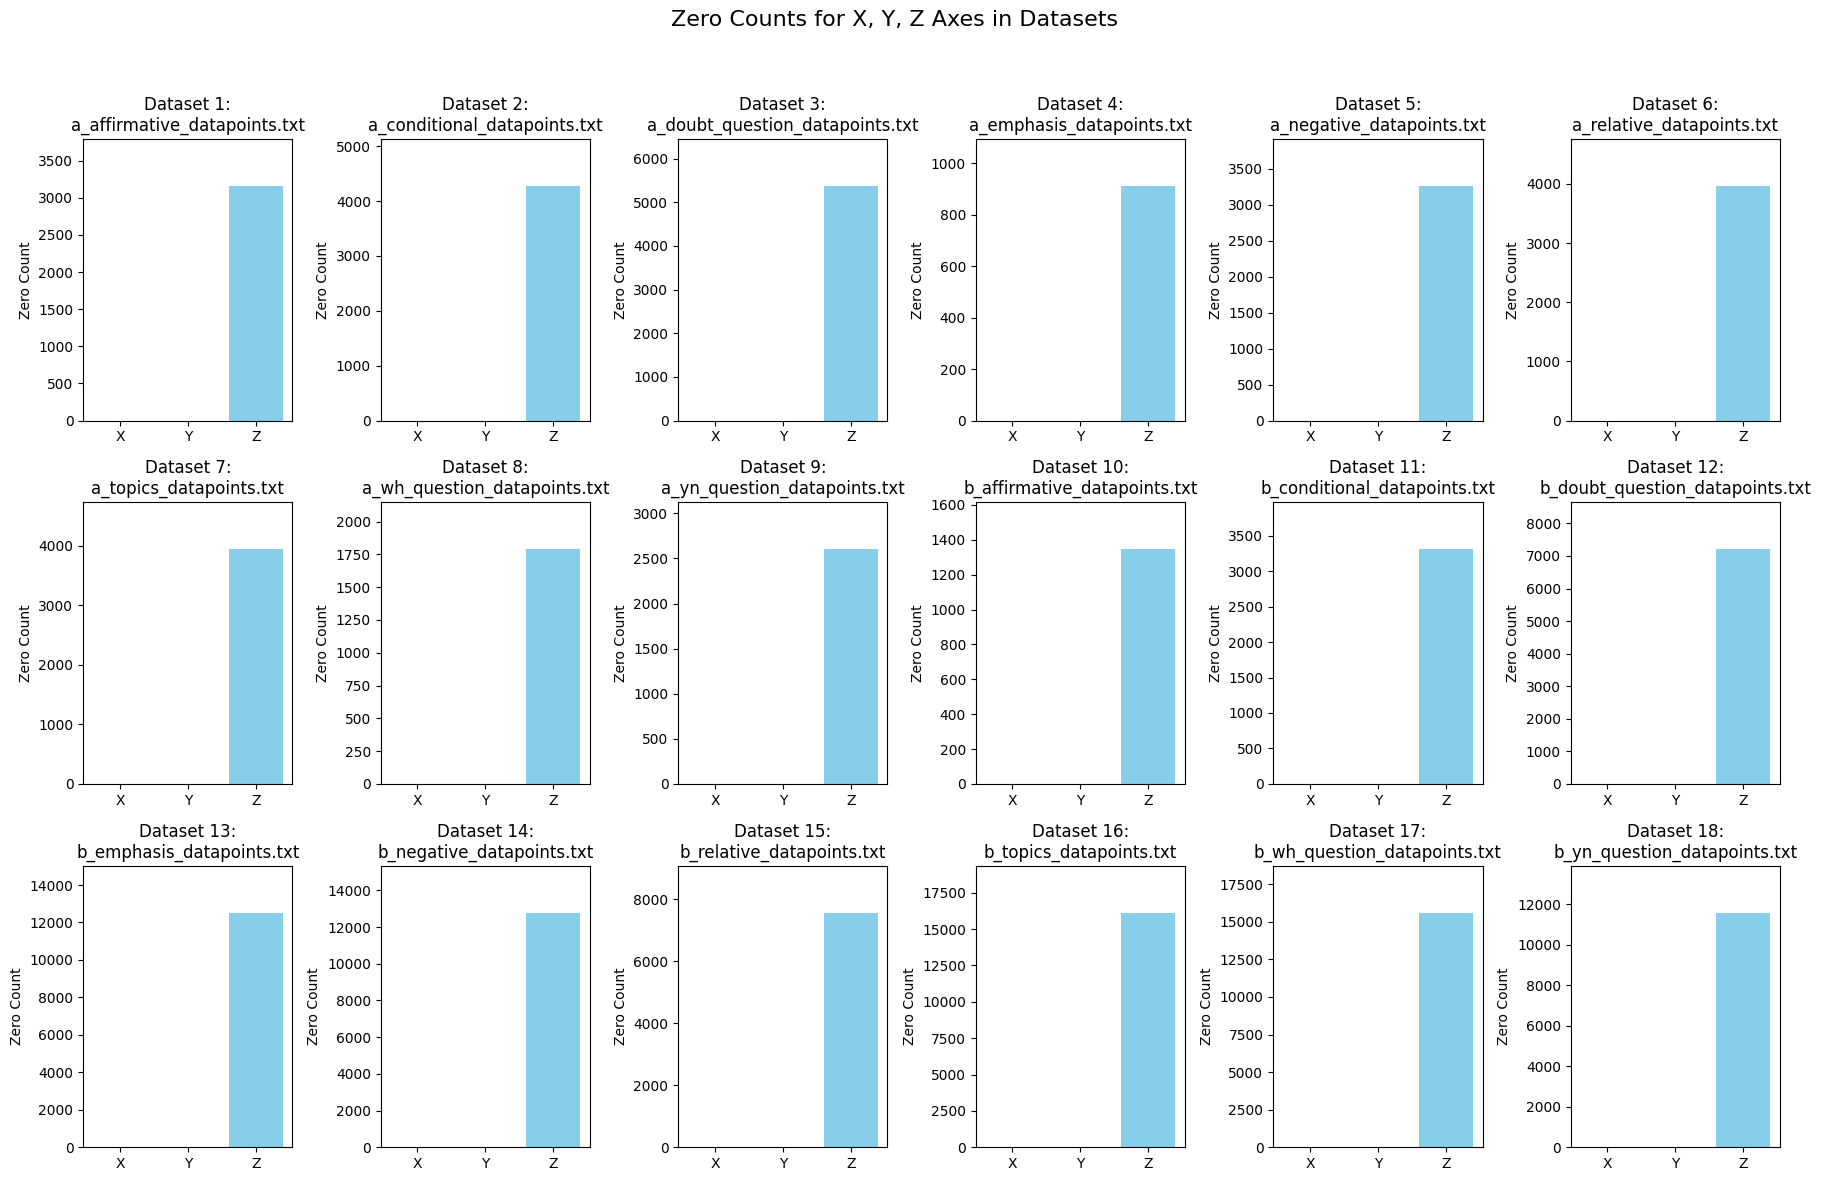

In [58]:
fig, axes = plt.subplots(3, 6, figsize=(18, 12))
axes = axes.flatten()

for i, points_file_name in enumerate(points_list):
    full_path = data_path + points_file_name

    df = pd.read_csv(full_path, sep='\s+')

    x_cols = df.iloc[:, 1::3]
    y_cols = df.iloc[:, 2::3]
    z_cols = df.iloc[:, 3::3]
    
    x_zero = (x_cols == 0).sum().sum()
    y_zero = (y_cols == 0).sum().sum()
    z_zero = (z_cols == 0).sum().sum()
        
    ax = axes[i]
    ax.bar(["X", "Y", "Z"], [x_zero, y_zero, z_zero], color="skyblue")
    ax.set_title(f"Dataset {i+1}:\n{points_file_name}")
    ax.set_ylabel("Zero Count")
    ax.set_ylim(0, max(x_zero, y_zero, z_zero)*1.2)

plt.suptitle("Zero Counts for X, Y, Z Axes in Datasets", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


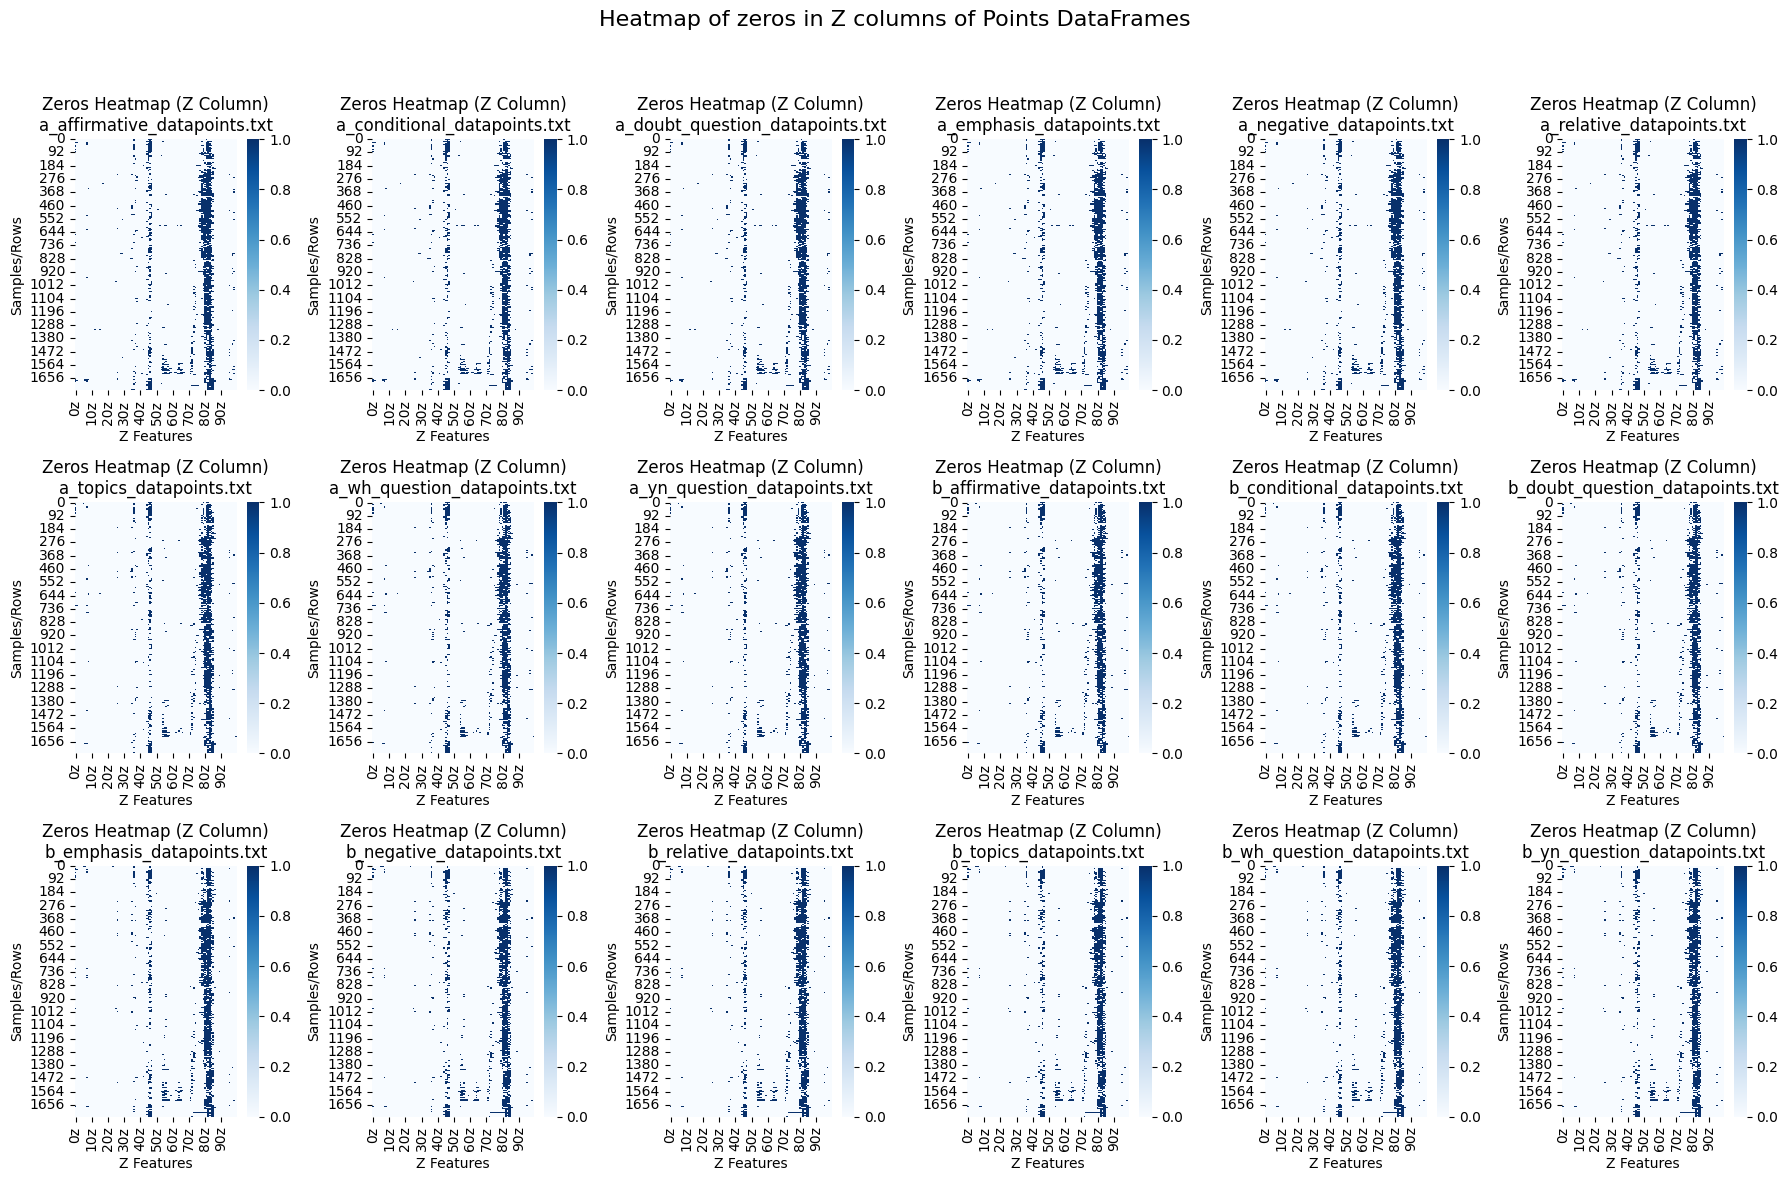

In [57]:
fig, axes = plt.subplots(3, 6, figsize=(18, 12))
axes = axes.flatten()

for i, points_file_name in enumerate(points_list):
  points_file = data_path + points_file_name

  df = pd.read_csv(full_path, sep='\s+')

  df_no_target = df.iloc[:, 1:] 
  z_cols = df_no_target.iloc[:, 2::3]
  zero_matrix = (z_cols == 0).astype(int)

  ax = axes[i]
  sns.heatmap(zero_matrix, ax=ax, cmap="Blues", cbar=True)
  ax.set_title(f"Zeros Heatmap (Z Column)\n{points_file_name}")
  ax.set_xlabel("Z Features")
  ax.set_ylabel("Samples/Rows")

plt.suptitle("Heatmap of zeros in Z columns of Points DataFrames", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [71]:
zs = [f"{i}z" for i in range(100)]
df_z_only = df[zs]
zero_percentage = (df_z_only == 0).sum(axis=0) / len(df_z_only)

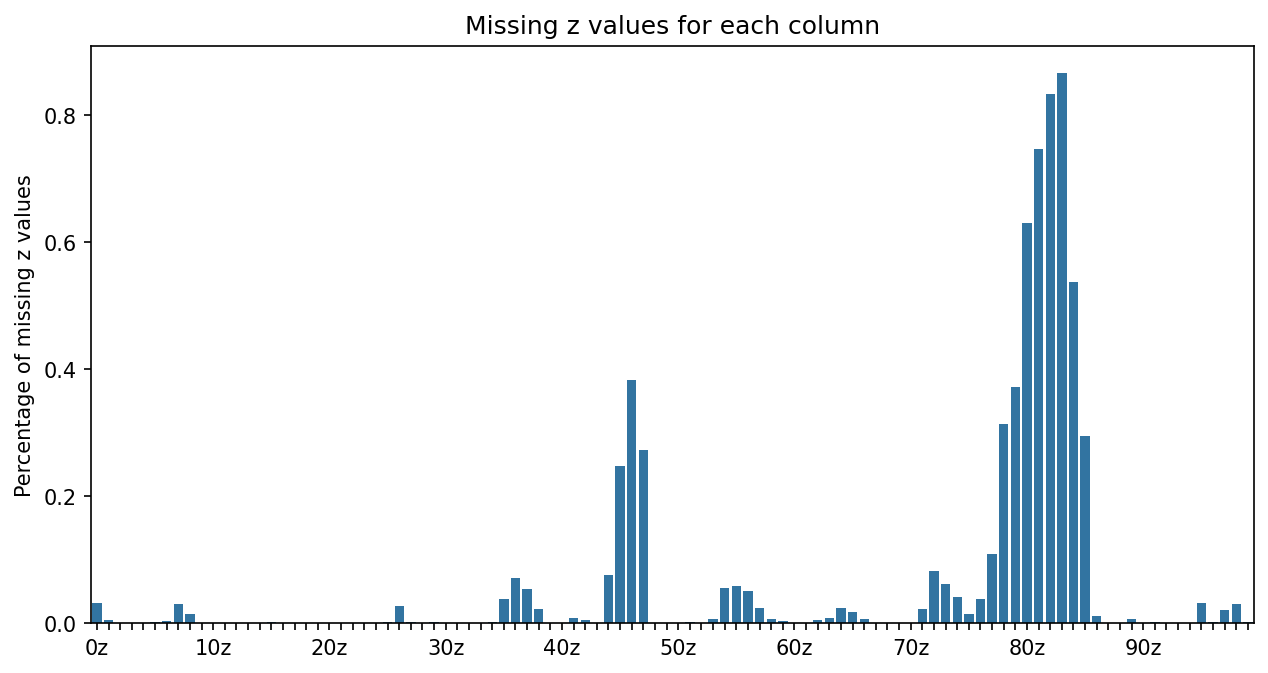

In [72]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
barplt = sns.barplot(zero_percentage, ax=ax)
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % 10 != 0]
ax.set_ylabel("Percentage of missing z values")

plt.title("Missing z values for each column")
plt.show()

In [73]:
zero_count = (df_z_only == 0).sum(axis=1)

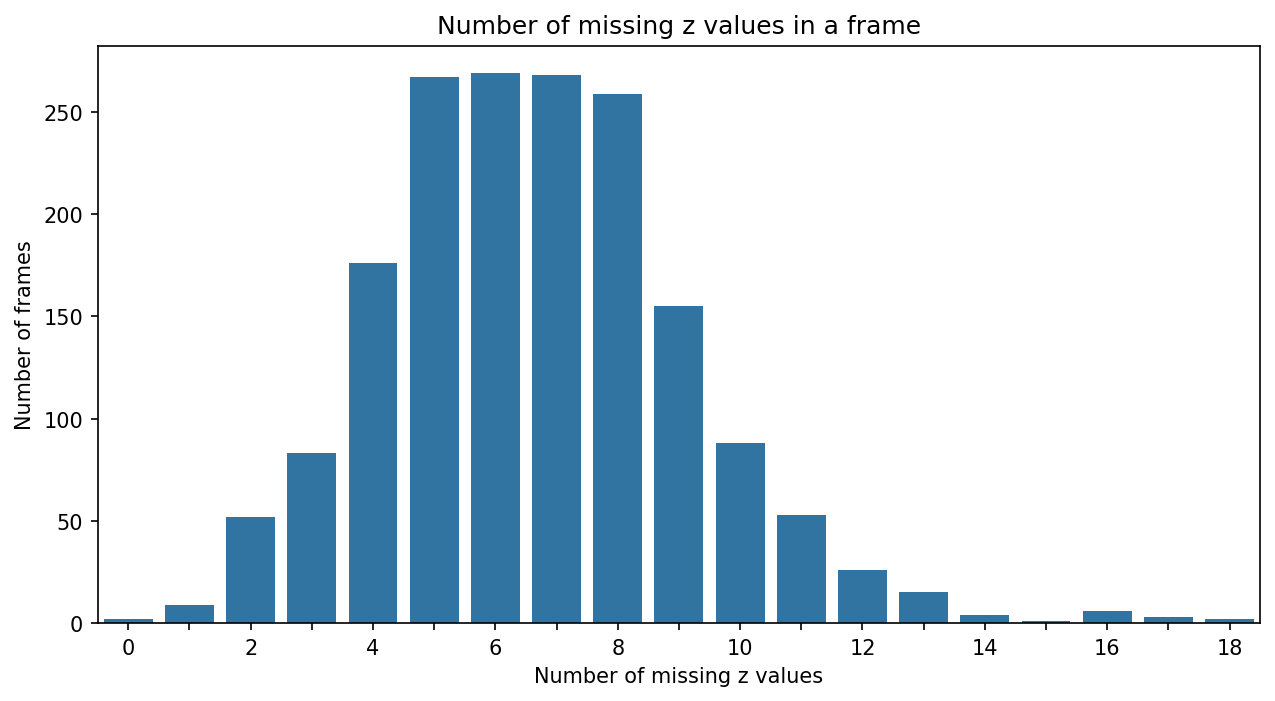

In [74]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
sns.barplot(x=zero_count.value_counts().index, y=zero_count.value_counts(), ax=ax)
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % 2 != 0]

ax.set_xlabel("Number of missing z values")
ax.set_ylabel("Number of frames")
plt.title("Number of missing z values in a frame")
plt.show()

### Comparing imputation methods

##### First method

In [78]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd

def fill_missing_zeros(dataframe: pd.DataFrame, dataframe_ref: pd.DataFrame, k=3) -> pd.DataFrame:
  """
  Fills missing Z values in a DataFrame using K-Nearest Neighbors (KNN).
  
  Args:
      dataframe (pd.DataFrame): Input DataFrame with missing Z values, where each triplet of columns represents (X, Y, Z).
      dataframe_ref (pd.DataFrame): Reference DataFrame for knn to find nearest neighbours from.
      k (int, optional): Number of neighbors for KNN. Default is 3.

  Returns:
      pd.DataFrame: DataFrame with missing Z values filled.
  """
  columns_with_zeros = list((dataframe == 0).sum()[(dataframe == 0).sum() > 0].index)

  for col in columns_with_zeros:
    rows_without_zeros = dataframe_ref[dataframe_ref[col] != 0]
    X, y = rows_without_zeros.drop(columns=[col]), rows_without_zeros[col]

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X.to_numpy(), y.to_numpy())

    rows_with_zeros = dataframe[dataframe[col] == 0]
    predicted_values = knn.predict(rows_with_zeros.drop(columns=[col]).to_numpy())
    zeros_index = dataframe[dataframe[col] == 0].index
    dataframe.loc[zeros_index, col] = predicted_values

  return dataframe

##### Second method

In [79]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd

def fill_missing_z(dataframe: pd.DataFrame, k=3) -> pd.DataFrame:
    """
    Fills missing Z values in a DataFrame using K-Nearest Neighbors (KNN).
    
    Args:
        dataframe (pd.DataFrame): Input DataFrame with missing Z values, where each triplet of columns represents (X, Y, Z).
        k (int, optional): Number of neighbors for KNN. Default is 3.

    Returns:
        pd.DataFrame: DataFrame with missing Z values filled.
    """
    dataframe_filled = dataframe.copy()

    for index, row in dataframe.iterrows():
        points_with_z = []
        points_missing_z = []

        for i in range(0, len(row), 3):
            triple = row.iloc[i:i+3]

            if triple.iloc[2] == 0:
                points_missing_z.append((triple.iloc[0], triple.iloc[1], i // 3))
            elif not triple.isnull().any():
                points_with_z.append((triple.iloc[0], triple.iloc[1], triple.iloc[2]))

        while points_missing_z:
            X_train = np.array([[x, y] for x, y, z in points_with_z])
            y_train = np.array([z for x, y, z in points_with_z])

            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(X_train, y_train)

            x_missing, y_missing, original_index = points_missing_z.pop(0)
            z_predicted = knn.predict([[x_missing, y_missing]])[0]

            points_with_z.insert(int(original_index), (x_missing, y_missing, z_predicted))

        updated_row = []
        for x, y, z in points_with_z:
            updated_row.extend([x, y, z])

        dataframe_filled.loc[index] = updated_row

    return dataframe_filled

##### Comparing function

In [66]:
import numpy as np
import pandas as pd

FRAC_ROWS = 0.85
FRAC_COLS = 0.2

def introduce_missing_zeros(dataframe:pd.DataFrame, frac_of_rows:float, max_frac_of_columns:float):

    cols_z = [col for col in dataframe.columns if 'z' in col]

    no_zeros_in_z = (dataframe[cols_z] != 0).all(axis=1)
    df_ideal = dataframe[no_zeros_in_z].copy()

    rows_to_corrupt = df_ideal.sample(frac=frac_of_rows, random_state=42).index

    original_values = {}

    for row_idx in rows_to_corrupt:

        fraction = np.random.uniform(0, max_frac_of_columns)
        
        n_to_zero = int(round(len(cols_z) * fraction))
        cols_to_zero = np.random.choice(cols_z, size=n_to_zero, replace=False)
    
        for col_zero in cols_to_zero:
            original_values[(row_idx, col_zero)] = df_ideal.loc[row_idx, col_zero]
            df_ideal.loc[row_idx, col_zero] = 0

    return original_values, df_ideal


def calculate_mse(original_values: dict, df_filled: pd.DataFrame):

    squared_errors = []
    for (row_idx, col_name), true_val in original_values.items():
        pred_val = df_filled.loc[row_idx, col_name]
        squared_errors.append((pred_val - true_val) ** 2)

    mse = np.mean(squared_errors)
    return mse

In [67]:
dict, data = introduce_missing_zeros(X, FRAC_ROWS, FRAC_COLS)

In [69]:
tab = [1, 3, 5, 7, 11]

for num in tab:
    print(f"test for: {num}")
    test1 =  fill_missing_zeros(data.copy(), data.copy(), num)
    test2 = fill_missing_z(data, num)

    print(f"First method: {calculate_mse(dict, test1)}")
    print(f"Second method: {calculate_mse(dict, test2)}")
    

test for: 1
First method: 2591.9888436192614
Second method: 872.0901260561648
test for: 3
First method: 1834.8095910846175
Second method: 578.171777084025
test for: 5
First method: 1632.1640917667005
Second method: 624.6839518033539
test for: 7
First method: 1548.653725852814
Second method: 766.1608302421467
test for: 11
First method: 1564.5506779408604
Second method: 1017.8413138659932


### Imputing values ​​for points where z=0

In [11]:
X_modified = fill_missing_z(X)

In [12]:
print((X_modified == 0).sum().sum())

0


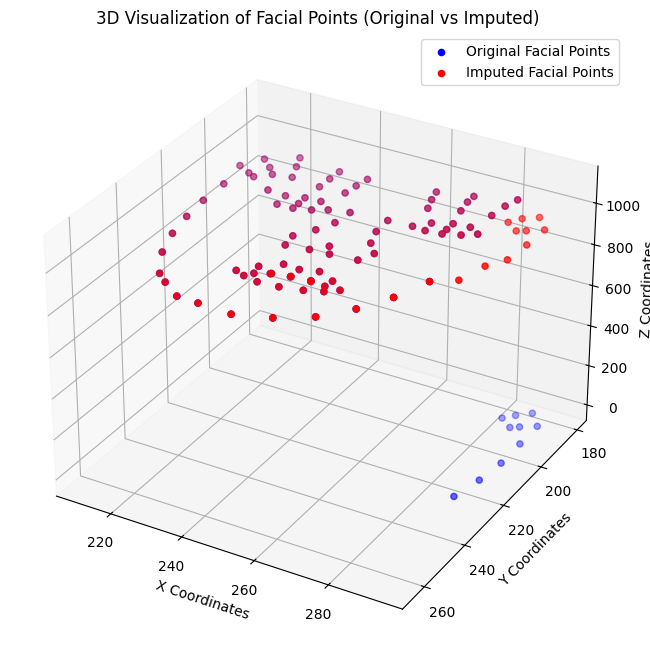

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.close('all')

row_original = X.iloc[0]
row_modified = X_modified.iloc[0]

x_coords_orig = row_original[0::3].values
y_coords_orig = row_original[1::3].values
z_coords_orig = row_original[2::3].values

x_coords_mod = row_modified[0::3].values
y_coords_mod = row_modified[1::3].values
z_coords_mod = row_modified[2::3].values

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords_orig, y_coords_orig, z_coords_orig, c='blue', s=20, label="Original Facial Points")

ax.scatter(x_coords_mod, y_coords_mod, z_coords_mod, c='red', s=20, label="Imputed Facial Points")

ax.set_ylim(ax.get_ylim()[::-1])

ax.set_title("3D Visualization of Facial Points (Original vs Imputed)")
ax.set_xlabel("X Coordinates")
ax.set_ylabel("Y Coordinates")
ax.set_zlabel("Z Coordinates")

plt.legend()
plt.show()


### Saving new data (without missing values) to csv

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_modified, y, test_size=0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [14]:
train = pd.concat([X_train, y_train], axis=1)
valid = pd.concat([X_valid, y_valid], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [15]:
output_path = ""

In [16]:
train.to_csv(f'{output_path}training_set.csv')
valid.to_csv(f'{output_path}validation_set.csv')
test.to_csv(f'{output_path}test_set.csv')

### Plots

In [17]:
import re
def min_max_norm(df):
    """
    Normalizuje wartości w DataFrame wzdłuż wierszy (min-max scaling).
    """
    MIN = df.min(axis=1)
    MAX = df.max(axis=1)
    return df.sub(MIN, axis=0).div(MAX - MIN, axis=0)

def plot(df):
    """
    Wizualizuje dane po znormalizowaniu, korzystając z nowego schematu nazw kolumn.
    """
    df = df[df['target'] == 1] 

    groups = {
        "x": [col for col in df.columns if re.search(r'\dx_.*$', col)],
        "y": [col for col in df.columns if re.search(r'\dy_.*$', col)],
        "z": [col for col in df.columns if re.search(r'\dz_.*$', col)],
    }

    
    for axis, cols in groups.items():
        if cols:  
            df[cols] = min_max_norm(df[cols])

    
    matrix = np.concatenate([
        df[[x, y, z]].to_numpy()
        for x, y, z in zip(groups["x"], groups["y"], groups["z"])
    ], axis=0)

   
    plot_df = pd.DataFrame(matrix, columns=['x', 'y', 'z'])
    plot_df = plot_df[plot_df['z'] > 0] 
    plot_df['y'] = 1 - plot_df['y']     


    sns.scatterplot(data=plot_df, x='x', y='y', hue='z', alpha=0.2, s=5, edgecolor='none')

   
    lgnd = plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=5)
    for lh in lgnd.legend_handles:
        lh.set_alpha(1)
        lh.set_markersize(8)

    plt.show()


In [48]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_emotion_3d(emotion, X_modified, y):
    """
    Wyświetla wykres 3D punktów twarzy dla podanej emocji,
    uwzględniając indeks wiersza w tytule wykresu.
    """

    plt.close('all')

    if emotion not in y.values:
        print(f"Emotion '{emotion}' is not found.")
        return

    index = y[y == emotion].index[0]  

    row_modified = X_modified.iloc[index]

    x_coords_mod = row_modified[0::3].values
    y_coords_mod = row_modified[1::3].values
    z_coords_mod = row_modified[2::3].values

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x_coords_mod, y_coords_mod, z_coords_mod, c='green', s=20, label=f"Imputed Facial Points ({emotion})")

    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_zlim(bottom=0)

    ax.set_title(f"3D Visualization for Emotion: {emotion} (Index: {index})")
    ax.set_xlabel("X Coordinates")
    ax.set_ylabel("Y Coordinates")
    ax.set_zlabel("Z Coordinates")

    plt.legend()

    plt.show()


In [18]:
doubt_question = df[df['expression'] == 'doubt_question']
yn_question = df[df['expression'] == 'yn_question']
affirmative = df[df['expression'] == 'affirmative']
negative = df[df['expression'] == 'negative']
topics = df[df['expression'] == 'topics']
conditional = df[df['expression'] == 'conditional']
relative = df[df['expression'] == 'relative']
emphasis = df[df['expression'] == 'emphasis']
wh_question = df[df['expression'] == 'wh_question']


In [19]:
import warnings
warnings.filterwarnings("ignore")

#### doubt_question

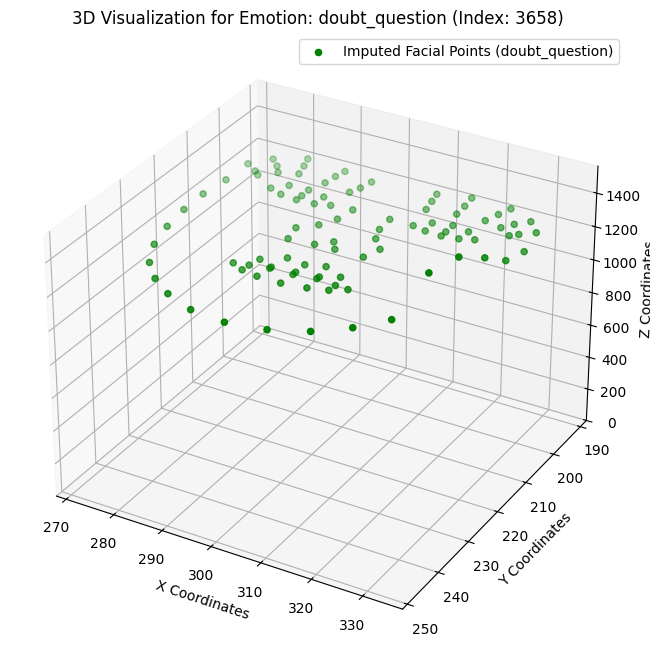

In [49]:
plot_emotion_3d("doubt_question", X_modified, y)

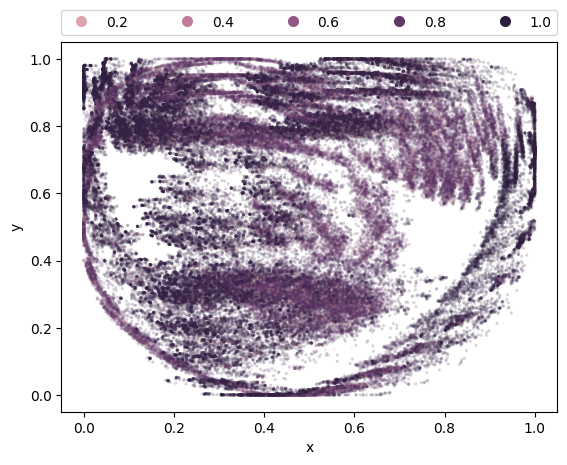

In [20]:
plot(doubt_question)

#### yn_question

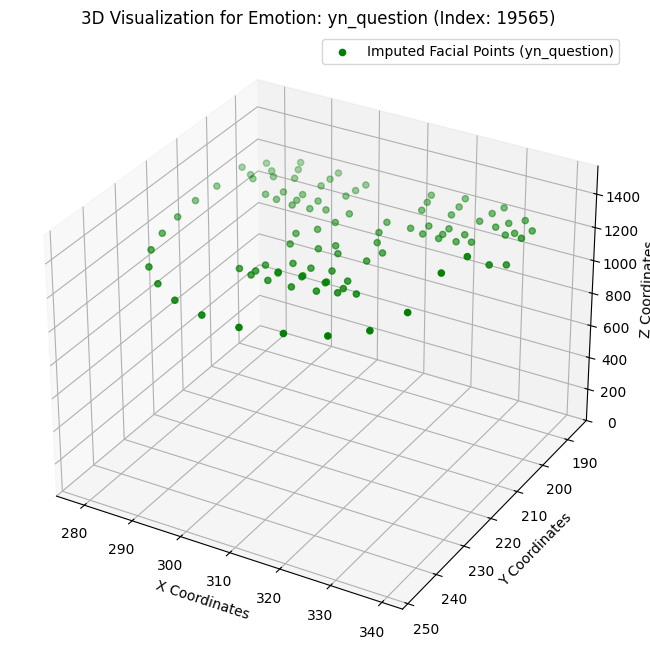

In [50]:
plot_emotion_3d("yn_question", X_modified, y)

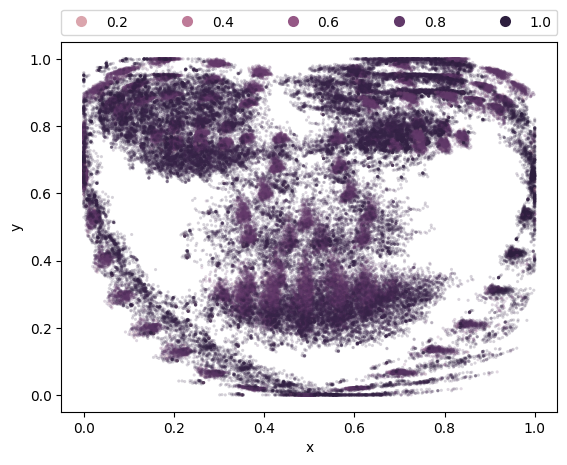

In [21]:
plot(yn_question)

#### affirmative

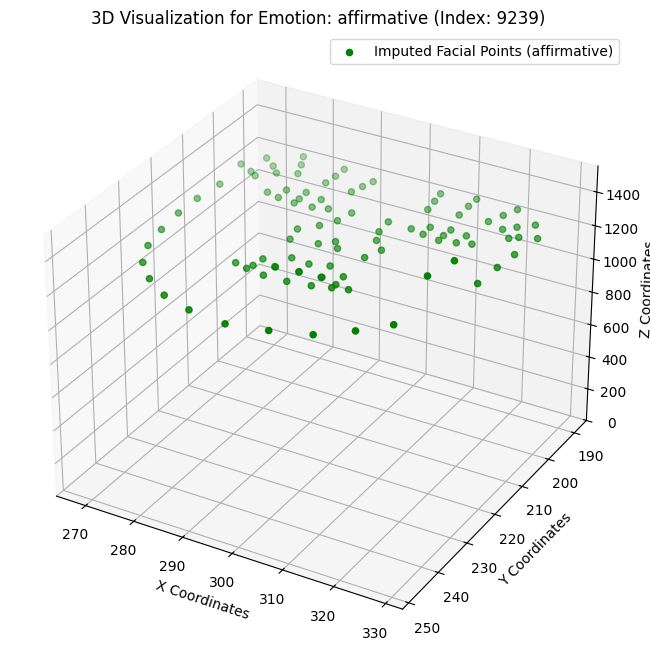

In [51]:
plot_emotion_3d("affirmative", X_modified, y)

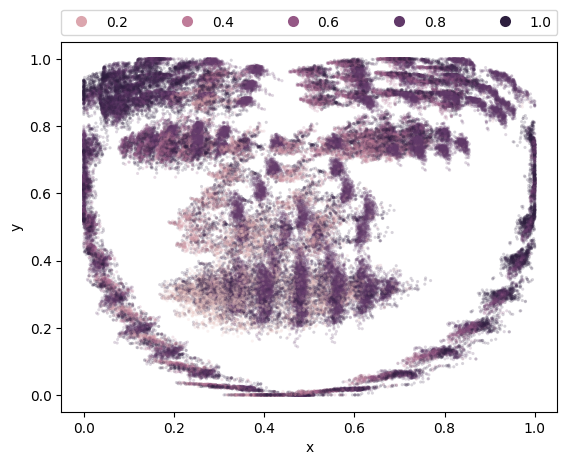

In [22]:
plot(affirmative)

#### topics

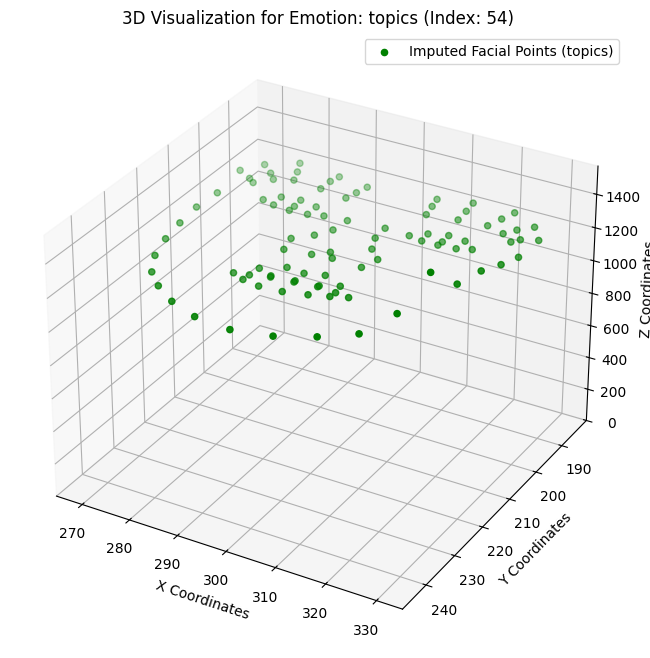

In [52]:
plot_emotion_3d("topics", X_modified, y)

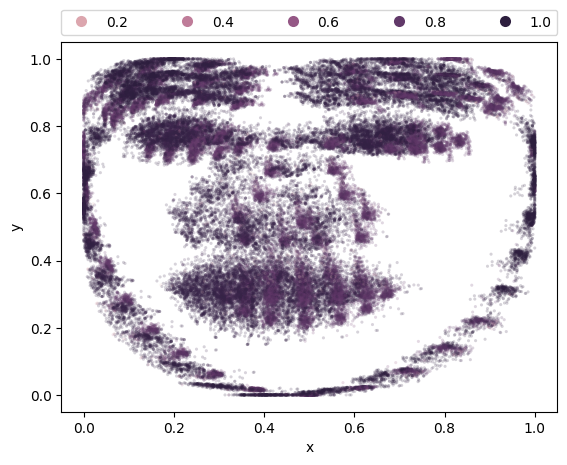

In [23]:
plot(topics)

#### conditional

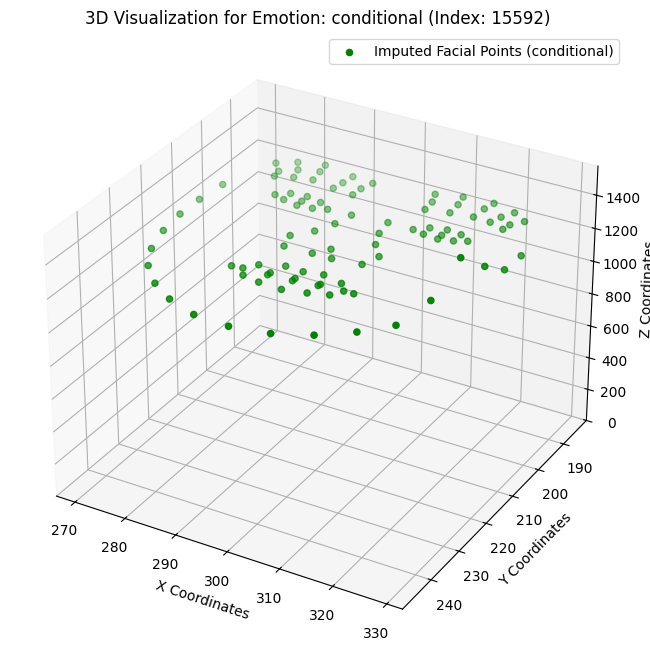

In [54]:
plot_emotion_3d("conditional", X_modified, y)

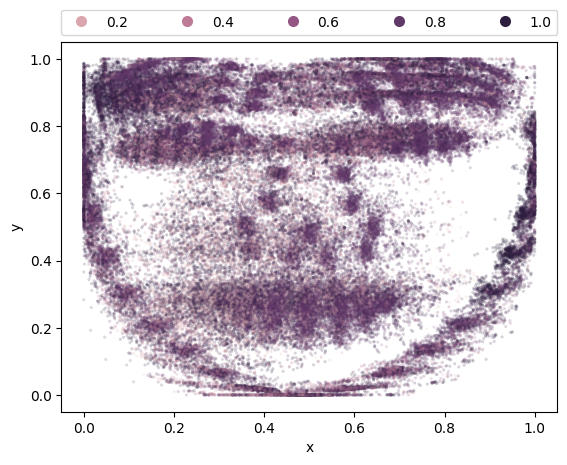

In [24]:
plot(conditional)

#### emphasis

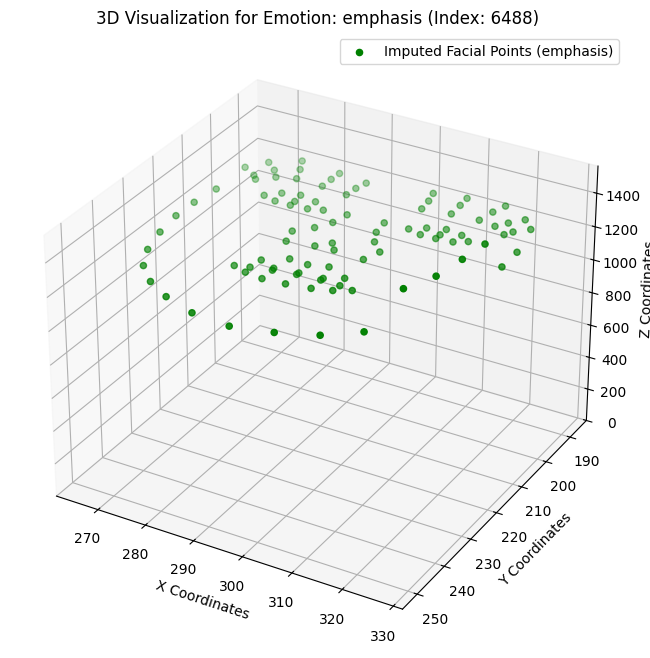

In [59]:
plot_emotion_3d("emphasis", X_modified, y)

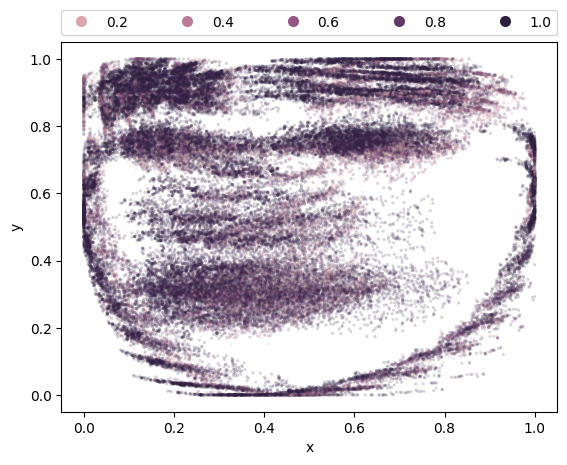

In [25]:
plot(emphasis)

#### negative

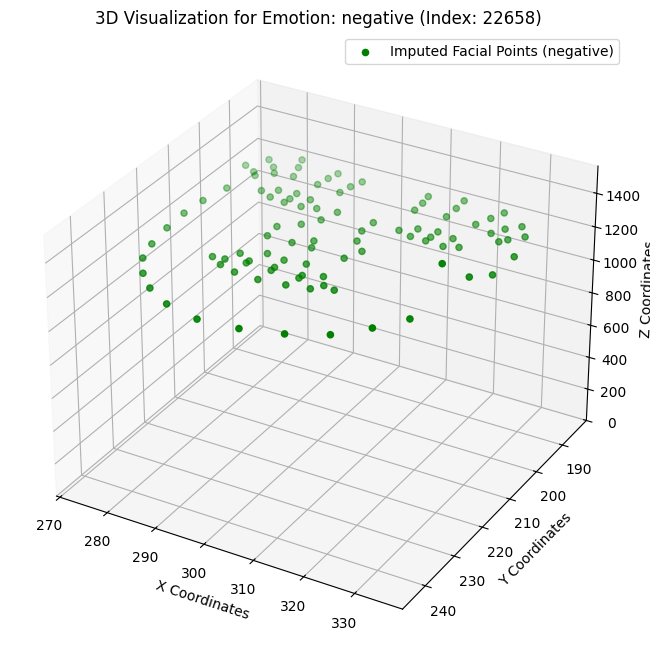

In [56]:
plot_emotion_3d("negative", X_modified, y)

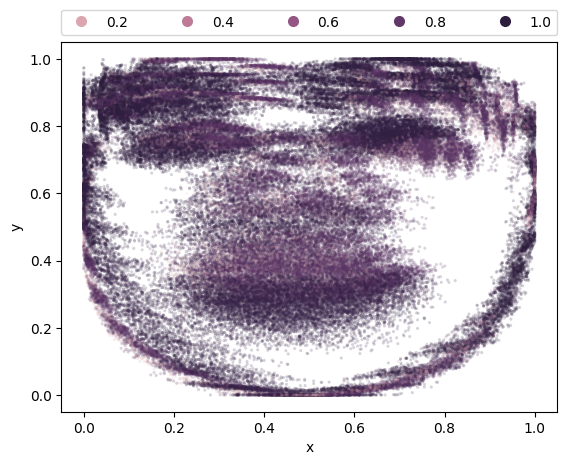

In [26]:
plot(negative)

#### relative

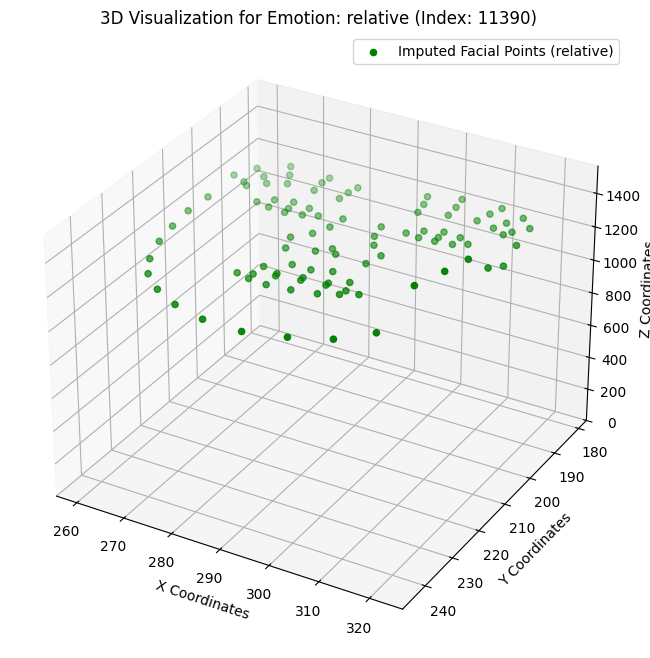

In [60]:
plot_emotion_3d("relative", X_modified, y)

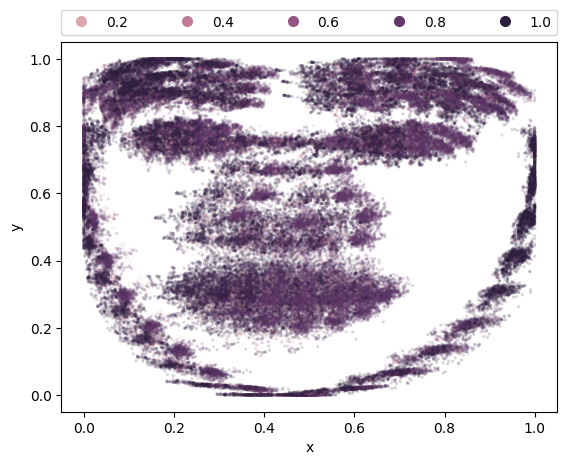

In [27]:
plot(relative)